# Análisis del Modelo de Árbol de Decisión


## Librerías a utilizar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier     #Importing the model from the framework.
from sklearn.model_selection import train_test_split    #Importing the splitter.
from sklearn import metrics     #Importing the metrics for our model.

from sklearn import tree

from sklearn.model_selection import learning_curve

## Importación del dataset

In [3]:
columns = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]   #Name of the columns to be used.

df = pd.read_csv("./pima-indians-diabetes.csv", header=None, names=columns)  #Importing the data we are going to use.

features = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age"]   #Name of the feature columns we are going to use.

X = df[features]    #Features to use on our model.
x = df[features].values     #Values of the features.
y = df.label    #Targets of our model.

df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Partición del dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=40)    #Splitting the data

# Modelado del Árbol de Decisión

In [13]:
tree_clf = DecisionTreeClassifier(criterion='gini')     #Define our model.
tree_clf = tree_clf.fit(X_train,y_train)    #Fit our model to our data.

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)   #Predict with out model.

accuracy_train = round(metrics.accuracy_score(y_train, y_pred_train),2)*100  #Calculate the accuracy of the model.
accuracy_test = round(metrics.accuracy_score(y_test, y_pred_test),2)*100  #Calculate the accuracy of the model.
roc_train = metrics.roc_auc_score(y_train, y_pred_train)
roc_test = metrics.roc_auc_score(y_test, y_pred_test)

print("Accuracy of the model in training is: %s" %(accuracy_train),"%")
print("ROC AUC of the model in training is: %s" %(roc_train))

cmat_train = metrics.confusion_matrix(y_train, y_pred_train)
print(cmat_train)

print("Accuracy of the model in testing is: %s" %(accuracy_test),"%")
print("ROC AUC of the model in testing is: %s" %(roc_test))

cmat_test = metrics.confusion_matrix(y_test, y_pred_test)
print(cmat_test)

Accuracy of the model in training is: 100.0 %
ROC AUC of the model in training is: 1.0
[[405   0]
 [  0 209]]
Accuracy of the model in testing is: 75.0 %
ROC AUC of the model in testing is: 0.729348795718109
[[79 16]
 [22 37]]


## Hyperparameter Tuning

In [15]:
train_accu = []
test_accu = []
max_deep_list = list(range(2, 25))

for deep in max_deep_list:
    pre_tree = DecisionTreeClassifier(criterion='gini', max_depth=deep)
    pre_tree.fit(X_train, y_train)
    y_predtr_pre = pre_tree.predict(X_train)
    y_predte_pre = pre_tree.predict(X_test)
    train_accu.append(metrics.accuracy_score(y_train, y_predtr_pre))
    test_accu.append(metrics.accuracy_score(y_test, y_predte_pre))

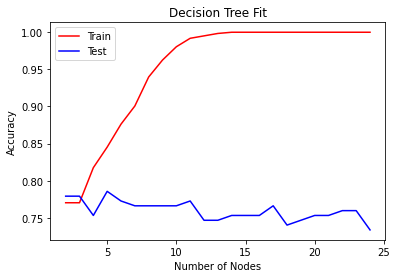

In [16]:
plt.plot(max_deep_list, train_accu, color='r', label="Train")
plt.plot(max_deep_list, test_accu, color='b', label="Test")
plt.title('Decision Tree Fit')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of Nodes')
plt.show()

In [17]:
tuned_tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)  #Obtain our tuned model.
tuned_tree_clf = tuned_tree_clf.fit(X_train,y_train)

y_pred_train = tuned_tree_clf.predict(X_train)
y_pred_test = tuned_tree_clf.predict(X_test)   #Predict with out model.

accuracy_train = round(metrics.accuracy_score(y_train, y_pred_train),2)*100  #Calculate the accuracy of the model.
accuracy_test = round(metrics.accuracy_score(y_test, y_pred_test),2)*100  #Calculate the accuracy of the model.
roc_train = metrics.roc_auc_score(y_train, y_pred_train)
roc_test = metrics.roc_auc_score(y_test, y_pred_test)

print("Accuracy of the model in training is: %s" %(accuracy_train),"%")
print("ROC AUC of the model in training is: %s" %(roc_train))

cmat_train = metrics.confusion_matrix(y_train, y_pred_train)
print(cmat_train)

print("Accuracy of the model in testing is: %s" %(accuracy_test),"%")
print("ROC AUC of the model in testing is: %s" %(roc_test))

cmat_test = metrics.confusion_matrix(y_test, y_pred_test)
print(cmat_test)

Accuracy of the model in training is: 85.0 %
ROC AUC of the model in training is: 0.81672278338945
[[367  38]
 [ 57 152]]
Accuracy of the model in testing is: 79.0 %
ROC AUC of the model in testing is: 0.7556645851917931
[[84 11]
 [22 37]]
